In [1]:
import copy
import matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats
import pandas as pd
import time
from scipy.stats import multivariate_t
import random
from sklearn.decomposition import PCA

In [24]:
def draw_heatmap(data, row_labels = "row", column_labels = "column"):
    # 描画する
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)
    plt.show()

    return heatmap

In [2]:
d = 1000
alpha1 = 3/5
alpha2 = 2/5
sig1 = np.zeros(d)
sig1[0:2] = np.array([d**alpha1,d**alpha2])
sig1 = np.diag(sig1)
sig2 = np.zeros((d,d))
for i in range(2,d):
    for j in range(2,d):
        sig2[i,j] = 1/(np.abs(i - j) + 1)
sigma1 = sig1 + sig2
x1 = np.random.multivariate_normal(np.zeros(d),sigma1,20).T
x2 = np.random.multivariate_normal(np.ones(d),2*d * np.identity(d),0).T
X = np.concatenate([x1,x2],axis = 1)

In [72]:
dim = [500,1000,1500,2000]
for i in range(1):
    d  = 1000
    alpha1 = 7/5
    alpha2 = 2/5
    # sig11 = np.zeros(d)
    # for i in range(1,d):
    #     sig11[i] = (-1)**i * (0.3**i)
    # sig11 /= np.linalg.norm(sig11)
    # sig11 = d**alpha1*np.dot(sig11.reshape(d,1),sig11.reshape(1,d))
    # sig22 = np.zeros(d)
    # sig22[0] =1
    # sig22 =d**alpha2* np.dot(sig22.reshape(d,1),sig22.reshape(1,d))
    # sig1 = sig1 + sig2
    sig1 = np.zeros(d)
    sig1[0:2] = np.array([d**alpha2,d**alpha1])
    sig1 = np.diag(sig1)
    sig2 = np.zeros((d,d))
    for i in range(d):
        for j in range(d):
            sig2[i,j] = 1/(np.abs(i - j) + 1)
    sigma1 = sig1 + sig2
    x1 = np.random.multivariate_normal(np.zeros(d),sigma1,100).T
    x2 = np.random.multivariate_normal(np.ones(d),2*d * np.identity(d),0).T
    # x2 = multivariate_t.rvs(np.ones(d),2*d*np.identity(d),df =10,size= 4*int(np.floor(d**2/30))).T
    X = np.concatenate([x1,x2],axis = 1)
    d,n = np.shape(X)
    lam1,vec1 = np.linalg.eigh(sigma1)
    sort1  = lam1.argsort()[::-1]
    lam1 = lam1[sort1]
    vec1 = (vec1.T[sort1]).T

    barX = np.dot(X.mean(axis = 1).reshape(d,1),np.ones(n).reshape(1,n))
    X1 = X - barX
    if n >d:
        S = (1/(n-1)) * X1 @ X1.T
        lam2,vec2 = np.linalg.eigh(S)
        sort2  = lam2.argsort()[::-1]
        lam2 = lam2[sort2]
        vec_2t = (vec2.T[sort2]).T
    else:
        S = (1/(n-1)) * X1.T @ X1
        lam2,vec2 = np.linalg.eigh(S)
        sort2  = lam2.argsort()[::-1]
        lam2 = lam2[sort2]
        vec2 = (vec2.T[sort2]).T
        vec_2t = np.zeros((d,n-1))
        for i in range(n-1):
            vec_2t[:,i] = np.dot((1/np.sqrt(lam2[i] * (n-1))) * X1,vec2[:,i])


    cenX = np.dot(np.median(X,axis=1).reshape(d,1),np.ones(n).reshape(1,n))
    X_s1 = X - barX
    X_s = np.zeros((d,n))
    N = np.zeros(n)
    for i in range(n):
        X_s[:,i] =X_s1[:,i]/ np.linalg.norm(X_s1[:,i],ord = 1)
        N[i] = np.linalg.norm(X_s1[:,i])
    barX_s = np.dot(X_s.mean(axis = 1).reshape(d,1),np.ones(n).reshape(1,n))
    X3 = X_s - barX_s
    if n > d:
        S_s = (1/(n-1)) * X3 @ X3.T
        lam3,vec3 = np.linalg.eigh(S_s)
        sort3  = lam3.argsort()[::-1]
        lam3 = lam3[sort3]
        vec_3t = (vec3.T[sort3]).T
    else:
        S_s = (1/(n-1)) * X3.T @ X3
        lam3,vec3 = np.linalg.eigh(S_s)
        sort3  = lam3.argsort()[::-1]
        lam3 = lam3[sort3]
        vec3 = (vec3.T[sort3]).T
        vec_3t = np.zeros((d,n-1))
        for i in range(n-1):
            vec_3t[:,i] = np.dot((1/np.sqrt(lam3[i] * (n-1))) * X3,vec3[:,i])
    # print(np.dot(vec1[:,0],vec_2t[:,0]),np.dot(vec1[:,0],vec_3t[:,0]))

In [53]:
# print(np.dot(vec_2t[:,0],vec_3t[:,0]))
print(np.dot(vec1[:,0],vec_2t[:,0]),np.dot(vec1[:,0],vec_3t[:,0]))
# print(lam1[:5]/np.sum(lam1),lam3[:5]/np.sum(lam3))

-0.9999933151395388 -0.9999935006638156


<AxesSubplot: >

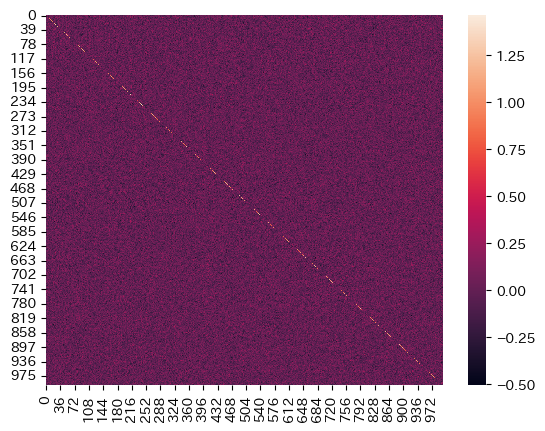

In [73]:
import seaborn as sns
Lam1 = np.diag(lam1**(-1/2))
Z = Lam1 @ vec1.T @ X
E = np.zeros((d,d))
for i in range(Z.shape[1]):
    E += np.dot(Z[:,i].reshape(d,1),Z[:,i].reshape(1,d))
E /= Z.shape[1]
sns.heatmap(E)

<AxesSubplot: >

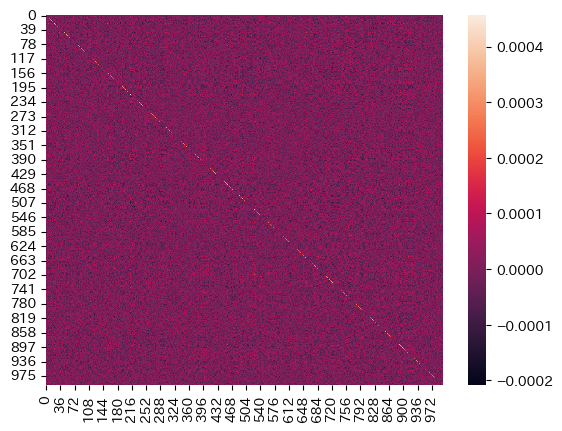

In [74]:
import seaborn as sns
Lam1 = np.diag(lam1**(-1/2))
Z = Lam1 @ vec1.T @ X
E = np.zeros((d,d))
for i in range(Z.shape[1]):
    z = Z[:,i]/np.linalg.norm(np.dot(np.diag(lam1**(1/2)),Z[:,i]))
    E += np.dot(z.reshape(d,1),z.reshape(1,d))
E /= Z.shape[1]
sns.heatmap(E)

In [75]:
print(E)

[[ 4.65210244e-05  3.38413279e-06  5.81148069e-07 ... -1.10417445e-05
  -2.95131568e-06  1.35601230e-05]
 [ 3.38413279e-06  2.56905562e-04  3.29889428e-05 ... -8.01196874e-05
   5.91088801e-05 -4.33187298e-06]
 [ 5.81148069e-07  3.29889428e-05  1.98715671e-04 ... -1.24432706e-05
  -4.29020703e-05 -1.18298835e-05]
 ...
 [-1.10417445e-05 -8.01196874e-05 -1.24432706e-05 ...  3.31356121e-04
  -7.58449657e-05  4.10655360e-06]
 [-2.95131568e-06  5.91088801e-05 -4.29020703e-05 ... -7.58449657e-05
   2.67668608e-04  1.25124629e-05]
 [ 1.35601230e-05 -4.33187298e-06 -1.18298835e-05 ...  4.10655360e-06
   1.25124629e-05  2.04341845e-04]]


In [16]:
h = np.dot(np.dot(vec1,np.diag(lam1**(-1/2))),X3)[0]
print(h)

[-0.1983313  -0.14904613 -0.17987647 -0.18976057  0.14033286  0.140496
 -0.07326751 -0.1953559   0.17275902  0.16875369  0.1722973  -0.19602289
  0.16196945 -0.19506583  0.16061769  0.02277826 -0.18815148  0.17033034
  0.08396883  0.17057462]


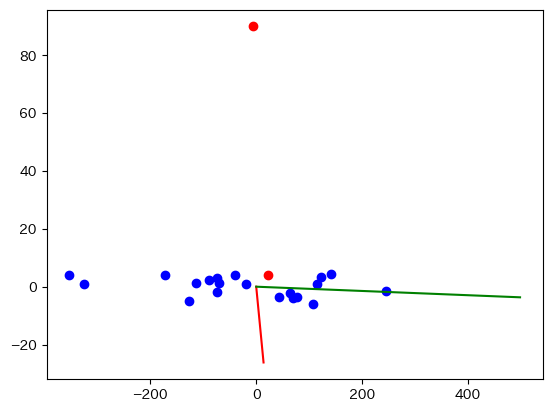

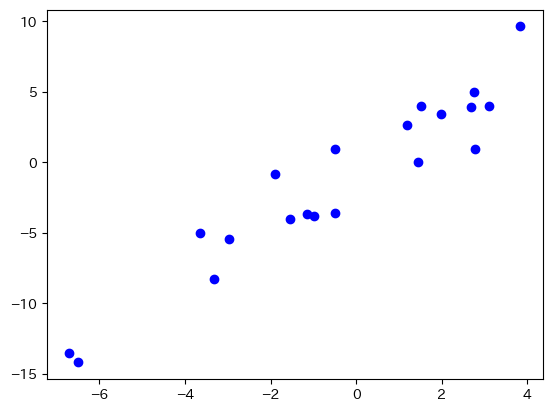

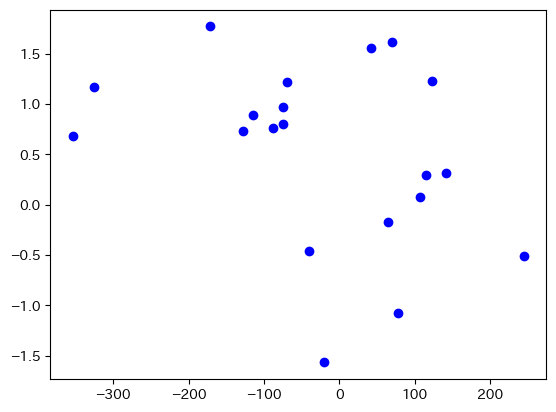

In [28]:
plt.scatter(np.dot((x1.T),vec1[:,0]),np.dot((x1.T),vec1[:,1]),c = "b")
plt.scatter(np.dot((x2.T),vec1[:,0]),np.dot((x2.T),vec1[:,1]),c = "r")
plt.plot(np.arange(0,700)*np.dot(vec1[:,0],vec_2t[:,0]),np.arange(0,700)*np.dot(vec1[:,1],vec_2t[:,0]),c = "r")
plt.plot(np.arange(0,500)*np.dot(vec1[:,0],vec_3t[:,0]),np.arange(0,500)*np.dot(vec1[:,1],vec_3t[:,0]),c = "g")
# plt.xlim(-80,80)
# plt.ylim(-80,60)
plt.show()

plt.scatter(np.dot((x1.T),vec_2t[:,0]),np.dot((x1.T),vec_2t[:,1]),c = "b")
# plt.scatter(np.dot((x2.T),vec_2t[:,0]),np.dot((x2.T),vec_2t[:,1]),c = "r")
# plt.xlim(-80,80)
# plt.ylim(-80,60)
plt.show()
plt.scatter(np.dot((x1.T),vec_3t[:,0]),np.dot((x1.T),vec_3t[:,1]),c = "b")
# plt.scatter(np.dot((x2.T),vec_3t[:,0]),np.dot((x2.T),vec_3t[:,1]),c = "r")
plt.show()

In [31]:
d = 1000
# gamma = 1 + 2 * (d**(-1/2))
alpha1 = 7/5
alpha2 = 6/5
n1 = 10
n2 = 1
n3 = 0
n = n1 + n2 + n3
mu1 = np.zeros(d)
# first = int(np.ceil(d**(3/4)))
# mu1[first:] = np.zeros(d - first)
mu2 = 2 * np.ones(d)
sigma1 = np.zeros((d,d))
for i in range(d):
    for j in range(i,d):
        sigma1[i,j] = 0.3**(np.abs(i - j)**(1/3))
sigma1 += sigma1.T
sigma1 = np.diag(1/2 * np.ones(d)) @ sigma1
# sigma1 *= gamma
b = np.zeros(d)
for i in range(d):
    b[i] = ((-1)**(i+1)) * (0.5 + (i + 1)/(d + 1))**(1/2)

B = np.diag(b)
sigma2 = np.dot(np.dot(B,sigma1),B)
sigma3 = np.dot(np.dot(B,sigma2),B)

sigma2 = 2 * np.identity(d)

x1 = np.random.multivariate_normal(mu1,sigma1,n1).T
x2 = np.random.multivariate_normal(mu2,sigma2,n2).T
x3 = np.random.multivariate_normal(mu2,sigma3,n3).T

X = np.concatenate([x1,x2,x3],axis = 1)

In [ ]:
lam1,vec1 = np.linalg.eigh(sigma1)
sort1  = lam1.argsort()[::-1]
lam1 = lam1[sort1]
vec1 = (vec1.T[sort1]).T

barX = np.dot(X.mean(axis = 1).reshape(d,1),np.ones(n).reshape(1,n))
X1 = X - barX
S = (1/(n-1)) * X1.T @ X1
lam2,vec2 = np.linalg.eigh(S)
sort2  = lam2.argsort()[::-1]
lam2 = lam2[sort2]
vec2 = (vec2.T[sort2]).T
vec_2t = np.zeros((d,n-1))
for i in range(n-1):
    vec_2t[:,i] = np.dot((1/np.sqrt(lam2[i] * (n-1))) * X1,vec2[:,i])

cenX = np.dot(np.median(X,axis=1).reshape(d,1),np.ones(n).reshape(1,n))
X_s1 = X - cenX
X_s = np.zeros((d,n))
for i in range(n):
    X_s[:,i] =X_s1[:,i]/ np.linalg.norm(X_s1[:,i])
barX_s = np.dot(X_s.mean(axis = 1).reshape(d,1),np.ones(n).reshape(1,n))
X3 = X_s - barX_s
S_s = (1/(n-1)) * X3.T @ X3
lam3,vec3 = np.linalg.eigh(S_s)
sort3  = lam3.argsort()[::-1]
lam3 = lam3[sort3]
vec3 = (vec3.T[sort3]).T
vec_3t = np.zeros((d,n-1))
for i in range(n-1):
    vec_3t[:,i] = np.dot((1/np.sqrt(lam3[i] * (n-1))) * X3,vec3[:,i])

In [32]:
d,n = np.shape(X)
lam1,vec1 = np.linalg.eigh(sigma1)
sort1  = lam1.argsort()[::-1]
lam1 = lam1[sort1]
vec1 = (vec1.T[sort1]).T

barX = np.dot(X.mean(axis = 1).reshape(d,1),np.ones(n).reshape(1,n))
X1 = X - barX
if n >d:
    S = (1/(n-1)) * X1 @ X1.T
    lam2,vec2 = np.linalg.eigh(S)
    sort2  = lam2.argsort()[::-1]
    lam2 = lam2[sort2]
    vec_2t = (vec2.T[sort2]).T
else:
    S = (1/(n-1)) * X1.T @ X1
    lam2,vec2 = np.linalg.eigh(S)
    sort2  = lam2.argsort()[::-1]
    lam2 = lam2[sort2]
    vec2 = (vec2.T[sort2]).T
    vec_2t = np.zeros((d,n-1))
    for i in range(n-1):
        vec_2t[:,i] = np.dot((1/np.sqrt(lam2[i] * (n-1))) * X1,vec2[:,i])


cenX = np.dot(np.median(X,axis=1).reshape(d,1),np.ones(n).reshape(1,n))
X_s1 = X - barX
X_s = np.zeros((d,n))
for i in range(n):
    X_s[:,i] =X_s1[:,i]/ np.linalg.norm(X_s1[:,i])
barX_s = np.dot(X_s.mean(axis = 1).reshape(d,1),np.ones(n).reshape(1,n))
X3 = X_s - barX_s
if n >d:
    S_s = (1/(n-1)) * X3 @ X3.T
    lam3,vec3 = np.linalg.eigh(S_s)
    sort3  = lam3.argsort()[::-1]
    lam3 = lam3[sort3]
    vec_3t = (vec3.T[sort3]).T
else:
    S_s = (1/(n-1)) * X3.T @ X3
    lam3,vec3 = np.linalg.eigh(S_s)
    sort3  = lam3.argsort()[::-1]
    lam3 = lam3[sort3]
    vec3 = (vec3.T[sort3]).T
    vec_3t = np.zeros((d,n-1))
    for i in range(n-1):
        vec_3t[:,i] = np.dot((1/np.sqrt(lam3[i] * (n-1))) * X3,vec3[:,i])

In [34]:
print(np.dot(vec1[:,0],vec_2t[:,0]),np.dot(vec1[:,0],vec_3t[:,0]))
print(lam2[:10],np.trace(sigma1)*lam3[:10])

-0.770534993882664 0.6932575028072736
[548.48251378 116.88164019 109.93568496 105.1758607  100.71584475
  95.295924    89.80537114  87.28428011  84.10206682  80.67755531] [153.61512463 118.1308157  115.12987466 112.1823788  107.56022162
 105.52984194 100.84566128  94.08044979  89.4179534   87.74157688]


In [ ]:
plt.scatter(np.dot(X[:,0:10].T,vec1[:,0]),np.dot(X[:,0:10].T,vec1[:,1]))
plt.scatter(np.dot(X[:,10].T,vec1[:,0]),np.dot(X[:,10].T,vec1[:,1]))
plt.show()
plt.scatter(np.dot(X[:,0:10].T,vec_2t[:,0]),np.dot(X[:,0:10].T,vec_2t[:,1]))
plt.scatter(np.dot(X[:,10].T,vec_2t[:,0]),np.dot(X[:,10].T,vec_2t[:,1]))
plt.show()
plt.scatter(np.dot(X[:,0:10].T,vec_3t[:,0]),np.dot(X[:,0:10].T,vec_3t[:,1]))
plt.scatter(np.dot(X[:,10].T,vec_3t[:,0]),np.dot(X[:,10].T,vec_3t[:,1]))
plt.show()

In [ ]:
lam,vec = np.linalg.eigh(sigma3)
sort  = lam.argsort()[::-3]
V = (vec.T[sort]).T
pc3 = V[0]


barX = np.dot(X.mean(axis = 3).reshape(d,3),np.ones(n).reshape(3,n))
X3 = X -  barX
S = (3/(n-3)) * X3 @ X3.T
lam,vec = np.linalg.eigh(S)
sort  = lam.argsort()[::-3]
V2 = (vec.T[sort]).T
es_pc3 = V2[0]
es_pc2 = V2[3]
Z3 = np.dot(X3.T,es_pc3)
Z2 = np.dot(X3.T,es_pc2)
print(np.dot(pc3,es_pc3))
plt.scatter(Z3,Z2)

barX = np.dot(np.median(X,axis = 3).reshape(d,3),np.ones(n).reshape(3,n))
X2 = X - barX
X_s = np.zeros((d,n))
for i in range(n):
    X_s[:,i] =X2[:,i]/ np.linalg.norm(X2[:,i])
barXs = np.dot(X.mean(axis = 3).reshape(d,3),np.ones(n).reshape(3,n))
X_s -= barXs
S = (3/(n-3)) * X_s @ X_s.T
lam,vec = np.linalg.eigh(S)
sort  = lam.argsort()[::-3]
V2 = (vec.T[sort]).T
es_pc3 = V2[0]
es_pc2 = V2[3]
Z3 = np.dot(X2.T,es_pc3)
Z2 = np.dot(X2.T,es_pc2)
print(np.dot(pc3,es_pc3))
plt.scatter(Z3,Z2)